In [1]:
from ash import *

ashpath: /Users/tom/Documents/ucl/projects/ash-fork/ash
Sys path: ['/Users/tom/Documents/ucl/projects/ash-fork/ash', '/Users/tom/.local/share/uv/python/cpython-3.11.12-macos-aarch64-none/lib/python311.zip', '/Users/tom/.local/share/uv/python/cpython-3.11.12-macos-aarch64-none/lib/python3.11', '/Users/tom/.local/share/uv/python/cpython-3.11.12-macos-aarch64-none/lib/python3.11/lib-dynload', '', '/Users/tom/Documents/ucl/projects/ash-fork/.venv/lib/python3.11/site-packages', '__editable__.ash-0.95.finder.__path_hook__']


/Users/tom/Documents/ucl/projects/ash-fork/.venv/lib/python3.11/site-packages/pennylane/__init__.py:21: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                                           ASH                                            
                              A MULTISCALE MODELLING PROGRAM                              
                                        Version: 0.9dev                                        
                               Git commit version: Unknown                                
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
ASH path: /Users/tom/Documents/ucl/projects/ash-fork/ash
Python version: 3.11.12
Python interpreter: /Users/tom/Documents/ucl/projects/ash-fork/.venv/bin/python

ASH Settings after reading defaults and ~/ash_user_settings.ini : 
See https://ash.readthedocs.io/en/latest/basics.html#ash-settings on how to ch

In [2]:
#Defining fragment
water_frag=Fragment(xyzfile="water.xyz", charge=0, mult=1)


--------------------------------------------------------------------------------
                                New ASH fragment                                
--------------------------------------------------------------------------------

ASH Fragment creation
Reading coordinates from XYZ file 'water.xyz' into fragment.
Creating/Updating fragment attributes...
Number of Atoms in fragment: 3
Formula: O1H2
Label: water
Charge: 0 Mult: 1

--------------------------------------------------------------------------------


In [3]:
xyz_list = [i for i in zip(water_frag.elems, water_frag.coords)]

lines = [str(len(xyz_list)), '']
for symbol, coords in xyz_list:
    line = f"{symbol} {coords[0]} {coords[1]} {coords[2]}"
    lines.append(line)

xyz_string = "\n".join(lines)
print(xyz_string)

3

O 0.0 0.0 0.0
H 0.0 0.758081 -0.635808
H -0.0 -0.758081 -0.635808


In [4]:
nbedobject = NbedTheory(
    geometry=xyz_string,
    n_active_atoms=1,
    basis="sto-3g",
    xc_functional="b3lyp",
    projector='mu',
    localization='spade'
)



                     #####################################                      
                     #                                   #                      
                     #     NbedTheory initialization     #                      
                     #                                   #                      
                     #####################################                      


In [5]:
Singlepoint(theory=nbedobject, fragment=water_frag)



                        ################################                        
                        #                              #                        
                        #     Singlepoint function     #                        
                        #                              #                        
                        ################################                        
 Charge/mult was not provided to Singlepoint 
 Fragment contains charge/mult information: Charge: 0 Mult: 1  Using this. 

Doing single-point Energy job on fragment. Formula: O1H2 Label: water 
Charge: 0 Mult: 1
Energy:  -75.14512909216526

-----------------------------------------------------------------
Time to calculate step (Singlepoint): 0.147 seconds, 0.0 minutes.
-----------------------------------------------------------------

Writing to disk defined attributes of ASH_Results dataclass
Results object data:
label : Singlepoint
energy : -75.14512909216526
charge : 0
mult : 1


/Users/tom/Documents/ucl/projects/ash-fork/.venv/lib/python3.11/site-packages/pyscf/dft/libxc.py:512: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '
Initialize <pyscf.gto.mole.Mole object at 0x1478aa210> in <pyscf.dft.rks.RKS object at 0x147ade4d0>


ASH_Results(label='Singlepoint', energy=np.float64(-75.14512909216526), qm_energy=None, mm_energy=None, qmmm_energy=None, gradient=None, reaction_energy=None, energy_contributions=None, energies=None, reaction_energies=None, relative_energies=None, labels=None, gradients=None, energies_dict=None, gradients_dict=None, worker_dirnames=None, geometry=None, initial_geometry=None, charge=0, mult=1, properties=None, hessian=None, frequencies=None, freq_masses=None, freq_elems=None, freq_coords=None, freq_atoms=None, freq_TRmodenum=None, freq_projection=None, freq_scaling_factor=None, freq_dipole_derivs=None, freq_polarizability_derivs=None, freq_Raman=None, normal_modes=None, Raman_activities=None, IR_intensities=None, depolarization_ratios=None, vib_eigenvectors=None, thermochemistry=None, displacement_dipole_dictionary=None, displacement_polarizability_dictionary=None, surfacepoints=None, reactant_geometry=None, product_geometry=None, saddlepoint_geometry=None, saddlepoint_fragment=None, M

In [13]:
from nbed.driver import NbedDriver

In [14]:
driver = NbedDriver(
    geometry=xyz_string,
    n_active_atoms=1,
    basis="sto-3g",
    xc_functional="b3lyp",
    projector='mu',
    localization='spade'
)

Initialize <pyscf.gto.mole.Mole object at 0x150ce2610> in <pyscf.dft.rks.RKS object at 0x14818ab50>


In [18]:
driver._global_ks.nuc_grad_method()

In [20]:
proj_data = driver._mu

In [21]:
emb_corr = (
    driver.e_env
    + driver.two_e_cross
    - proj_data["correction"]
    - proj_data["beta_correction"]
)

emb_ccsd, _ = driver._run_emb_CCSD(driver.embedded_scf)
emb_ccsdt_energy = emb_ccsd.e_tot + emb_ccsd.ccsd_t()

print(emb_ccsdt_energy + emb_corr)

-75.14512909216526


In [22]:
import pyscf

In [24]:
mol = pyscf.M(
    atom='water.xyz',
    basis="sto-3g",
    charge=0,
    spin=0,
    verbose=0
)

In [26]:
rhf = pyscf.scf.RHF(mol).run()

In [27]:
rhf.e_tot

np.float64(-74.96590119225972)

In [28]:
cc = pyscf.cc.CCSD(rhf).run()

In [29]:
ccsd = cc.e_tot + cc.ccsd_t()

In [30]:
ccsd

np.float64(-75.0203517454274)

In [31]:
import matplotlib.pyplot as plt

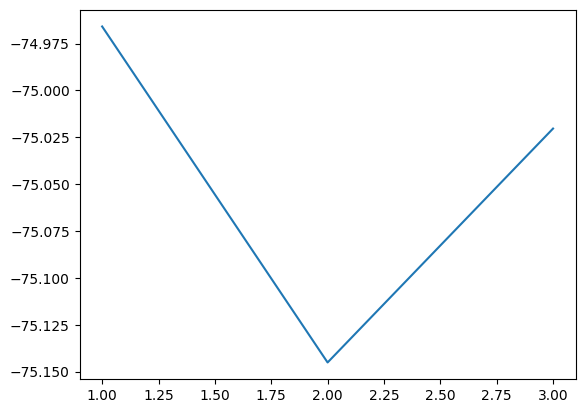

In [32]:
plt.plot([1, 2, 3], [-74.96590119225972, -75.14512909216526, -75.0203517454274])